In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
from rbf_net import RBF_Net
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import tensorflow as tf
tf.random.set_seed(123) # for reproducibility

import matplotlib.pyplot as plt # plotting library
#%matplotlib inline

from tensorflow import keras
from keras import  backend as K

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
#import dataset
from keras.datasets import mnist

# load dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data() # ouput numpy arrays

In [3]:
print(f'Your training set shape is {x_train.shape} and should be (60000, 28, 28).')
print(f'Your training classes shape is {y_train.shape} and should be (60000,).')
print(f'Your test set shape is {x_test.shape} and should be (10000, 28, 28).')
print(f'Your test classes shape is {y_test.shape} and should be (10000,).')

Your training set shape is (60000, 28, 28) and should be (60000, 28, 28).
Your training classes shape is (60000,) and should be (60000,).
Your test set shape is (10000, 28, 28) and should be (10000, 28, 28).
Your test classes shape is (10000,) and should be (10000,).


In [4]:
print("labels: ",np.unique(y_train)) # multi-classification

# count the number of unique train labels
category_name, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(category_name, counts)))

# count the number of unique test labels
category_name, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(category_name, counts)))

labels:  [0 1 2 3 4 5 6 7 8 9]
Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


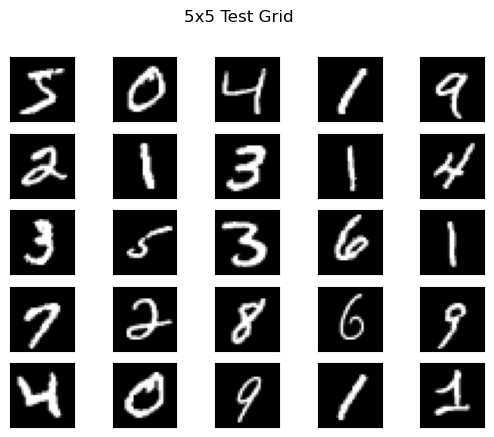

In [5]:
fig, axs = plt.subplots(5,5)

axs = axs.flatten()
fig.suptitle("5x5 Test Grid")

for i in range(len(axs)):
    axs[i].imshow(x_train[i], cmap='gray')
    axs[i].set_xticks([])
    axs[i].set_yticks([])

plt.show()

In [6]:
# Your reshape code here
def flatten(data):
    d1,d2,d3 = data.shape
    return data.reshape(d1, d2*d3)

flatten_train = flatten(x_train)
flatten_test = flatten(x_test)

#Normalize Data

norm_train = flatten_train/255
norm_test = flatten_test/255

print(norm_train.min())
print(norm_test.max())

0.0
1.0


In [7]:
x_train_1500 = norm_train[:1500]
y_train_1500 = y_train[:1500]

x_test_1500 = norm_test[:1500]
y_test_1500 = y_test[:1500]

mnist_net = RBF_Net(num_hidden_units=175, num_classes=10)
mnist_net.train(x_train_1500, y_train_1500)

In [8]:

# Predicting/accuracy
y_pred_train = mnist_net.predict(x_train_1500)
print("Train accuracy:", mnist_net.accuracy(y_train_1500, y_pred_train))

y_pred_test = mnist_net.predict(x_test_1500)
print("Test accuracy:", mnist_net.accuracy(y_test_1500, y_pred_test))

Train accuracy: 0.9373333333333334
Test accuracy: 0.8733333333333333


In [9]:
def confusion_matrix(y_train, y_pred,num_classes):
    c_mat = np.zeros((num_classes,num_classes))
    for true in range(num_classes):
        for pred in range(num_classes):
            c_mat[true, pred] = np.sum((y_train == true) & (y_pred == pred))
    return c_mat

confusion_train = confusion_matrix(y_train_1500, y_pred_train, mnist_net.num_classes)

print(confusion_train)

[[138.   0.   0.   1.   0.   0.   1.   0.   0.   0.]
 [  0. 166.   1.   2.   0.   2.   1.   0.   0.   0.]
 [  0.   1. 136.   1.   0.   1.   1.   1.   2.   1.]
 [  0.   1.   1. 131.   1.   4.   0.   2.   0.   2.]
 [  0.   1.   1.   0. 152.   0.   4.   0.   1.   1.]
 [  0.   1.   1.   3.   2. 127.   1.   0.   1.   1.]
 [  2.   0.   1.   0.   0.   2. 136.   0.   0.   0.]
 [  0.   2.   1.   0.   5.   0.   0. 166.   0.   3.]
 [  0.   0.   2.   4.   1.   4.   2.   1. 120.   0.]
 [  2.   0.   0.   1.   8.   2.   0.   6.   0. 134.]]
